<a href="https://colab.research.google.com/github/i-am-batman-28/Data-Sci/blob/main/Perfume_Brands_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ebay_mens_perfume.csv')


In [5]:
df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [6]:
df.describe()

,price,available,sold
count,1000.000000,889.000000,994.000000
mean,46.481200,20.046119,766.266600
std,35.527862,61.547985,3200.971733
min,3.000000,2.000000,1.000000
25%,22.990000,5.000000,14.000000
50%,35.710000,10.000000,49.500000
75%,59.000000,10.000000,320.500000
max,259.090000,842.000000,54052.000000


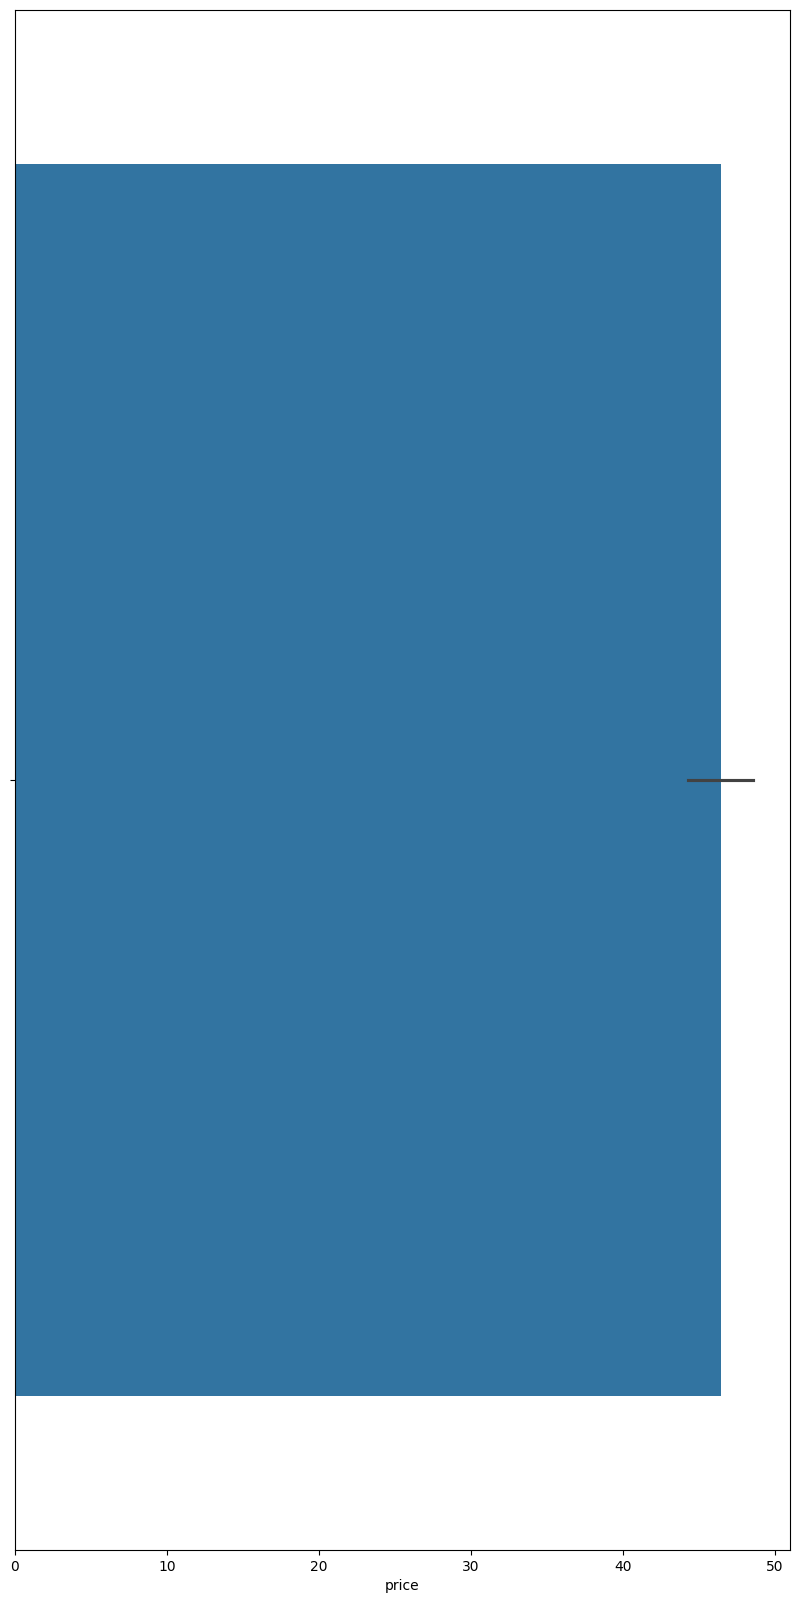

In [12]:
plt.figure(figsize = (10,20))
sns.barplot(data = df, x = 'price')
plt.show()

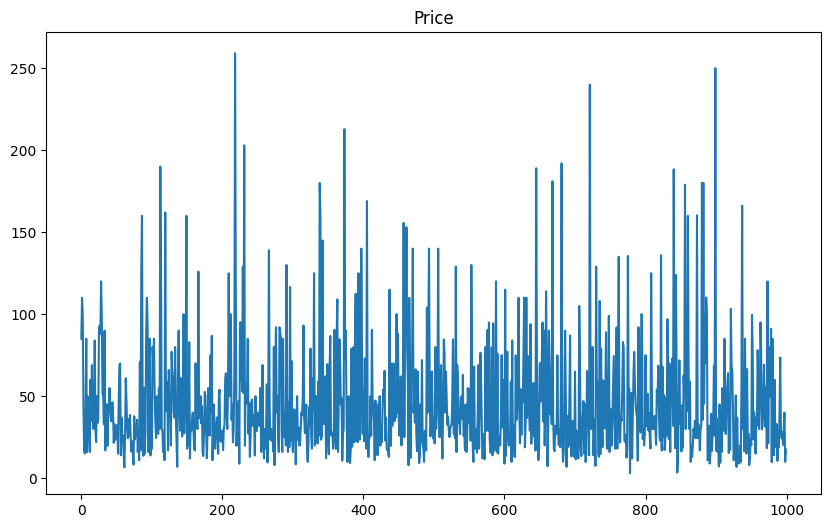

In [13]:
df['price'].plot(kind = 'line', figsize = (10,6), title = 'Price')
plt.show()

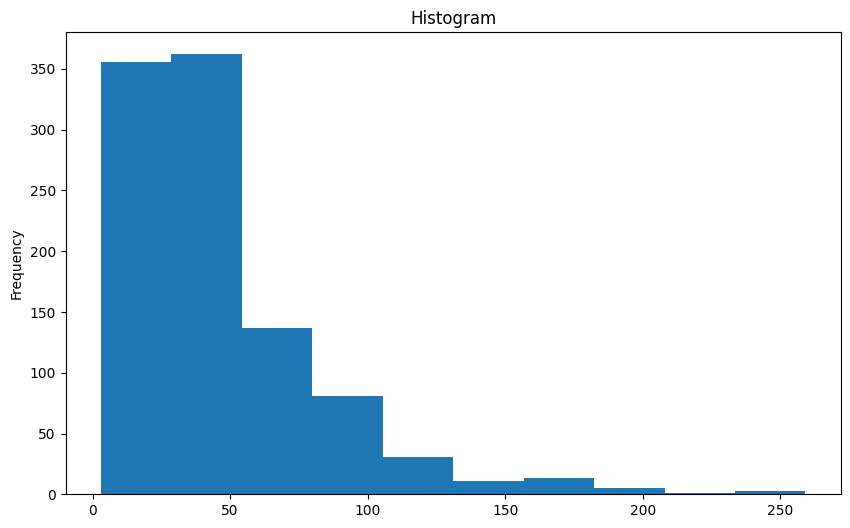

In [15]:
df['price'].plot(kind = 'hist', figsize = (10,6), title = 'Histogram')
plt.show()

In [44]:
cat = df.columns[df.dtypes == 'object']
num = df.columns[df.dtypes != 'object']
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])


In [76]:
df = df.dropna()

In [77]:
x= df.drop('price', axis = 1)
y = df['price']

In [78]:
for column in cat:
  le = LabelEncoder()
  df[column]= le.fit_transform(df[column])

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [80]:
num_pipeline =  Pipeline(


    steps=[
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scaler',StandardScaler() )

    ]


)

cat_pipeline = Pipeline(

    steps = [

      ('imputer', SimpleImputer(strategy = 'most_frequent')),
      ('one', OneHotEncoder(handle_unknown='ignore')),
      ('scaler', StandardScaler())


    ]


)






In [81]:
preprocessor= ColumnTransformer(

        transformers=[('numm', num_pipeline, num),
                      ('catt', cat_pipeline, cat)]



)

In [82]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [83]:
x_train.head()

,brand,title,type,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
497,185,466,29,548,10.0,26,313.0,729,127
415,71,314,29,362,10.0,708,573.0,838,62
409,232,945,25,233,12.0,53,6.0,608,231
100,181,622,29,136,3.0,163,324.0,285,62
951,16,89,44,680,3.0,138,13.0,424,25


In [92]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')


Shape of x_train: (452, 9)
Shape of x_test: (114, 9)


In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [96]:
models = {

        'Decision_Tree_Regressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'LinearRegression':LinearRegression(),
        'Ridge':Ridge(),
        'Lasso':Lasso(),
        'ElasticNet':ElasticNet()


}

In [101]:
for name, model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f"Root Mean Squared Error (RMSE) of the given model {name} is\n", {rmse})
  print(f"The mean squared error of the given model {name} is {mse}\n")
  print(f"The r2 score of the given model {name} is {r2}/n")


Root Mean Squared Error (RMSE) of the given model Decision_Tree_Regressor is
 {46.48643287270029}
The mean squared error of the given model Decision_Tree_Regressor is 2160.9884412280703

The r2 score of the given model Decision_Tree_Regressor is -0.4830748157364333/n
Root Mean Squared Error (RMSE) of the given model RandomForestRegressor is
 {30.997536082927116}
The mean squared error of the given model RandomForestRegressor is 960.8472432123685

The r2 score of the given model RandomForestRegressor is 0.34057567315435333/n
Root Mean Squared Error (RMSE) of the given model LinearRegression is
 {37.357976872571335}
The mean squared error of the given model LinearRegression is 1395.6184360115749

The r2 score of the given model LinearRegression is 0.04219452758850328/n
Root Mean Squared Error (RMSE) of the given model Ridge is
 {37.35797717430093}
The mean squared error of the given model Ridge is 1395.6184585555889

The r2 score of the given model Ridge is 0.04219451211666703/n
Root Mea

In [112]:
best_modell = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(x_test)))


In [113]:
print(best_modell)

RandomForestRegressor


In [114]:
import pickle
best_modell = RandomForestRegressor()
best_modell.fit(x_train, y_train)
with open('best_modell.pkl', 'wb') as file:
  pickle.dump(best_modell, file)

In [116]:
from google.colab import files
files.download('best_modell.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>